In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/insurance.csv'
data = pd.read_csv(file_path)

In [13]:
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset information:")
print(data.info())

print("\nDataset statistics:")
print(data.describe())

cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']

print("\nChecking for missing values:")
print(data.isnull().sum())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Dataset statistics:
               age 

This section explores the basic structure and properties of our dataset. We examine the first few rows to understand the data format, check the data types and missing values, and get basic statistical information. We also identify which variables are categorical and which are numerical for future preprocessing steps.


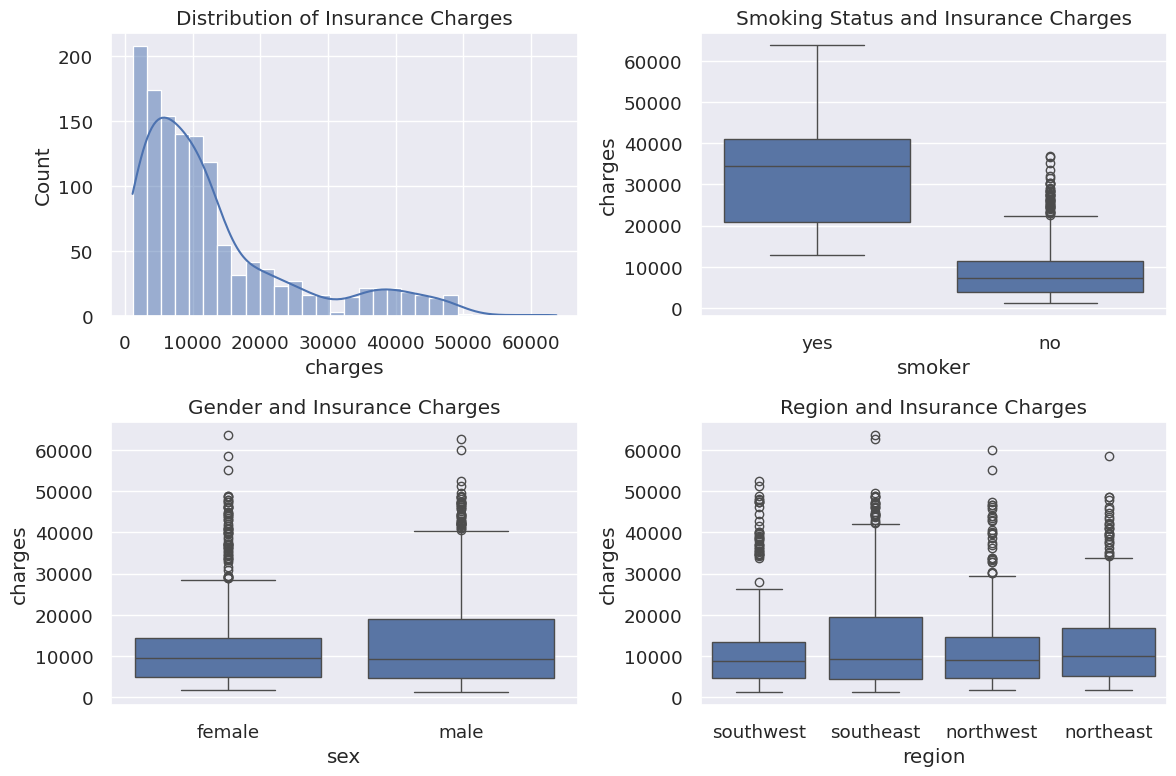

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Insurance Charges')

plt.subplot(2, 2, 2)
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoking Status and Insurance Charges')

plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Gender and Insurance Charges')

plt.subplot(2, 2, 4)
sns.boxplot(x='region', y='charges', data=data)
plt.title('Region and Insurance Charges')

plt.tight_layout()
plt.show()

In this first visualization section, we're examining the distribution of insurance charges and how they relate to categorical variables. The histogram shows the overall distribution of charges, while the boxplots demonstrate how charges vary based on smoking status, gender, and region. This helps us identify which categorical variables might have the strongest influence on insurance premiums.


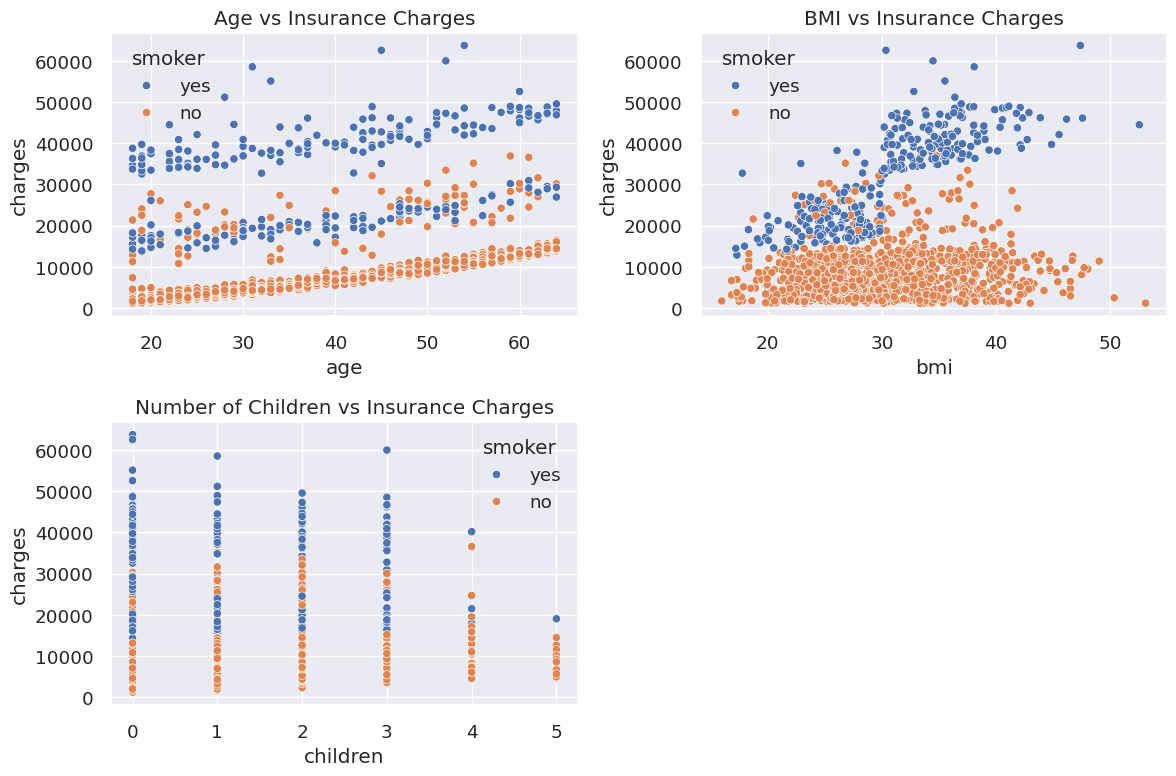

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=data, hue='smoker')
plt.title('Age vs Insurance Charges')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
plt.title('BMI vs Insurance Charges')

plt.subplot(2, 2, 3)
sns.scatterplot(x='children', y='charges', data=data, hue='smoker')
plt.title('Number of Children vs Insurance Charges')

plt.tight_layout()
plt.show()

This visualization section focuses on the relationships between numerical variables and insurance charges. We're using scatterplots to visualize how age, BMI, and number of children correlate with insurance charges. By coloring the points based on smoking status, we can also see how this categorical variable interacts with the numerical variables to influence charges.


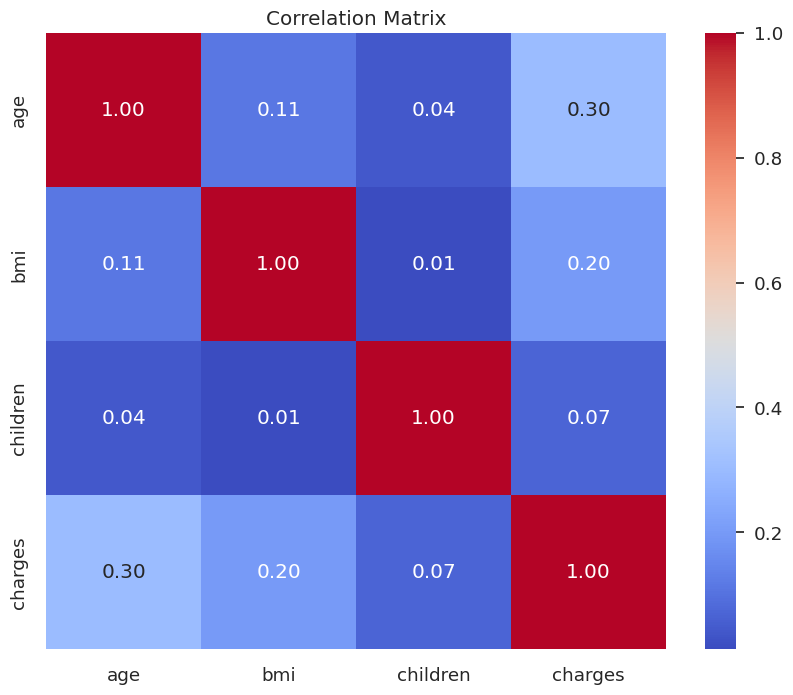

In [16]:
plt.figure(figsize=(10, 8))

corr_matrix = data[num_cols + ['charges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In this section, we're creating a correlation matrix to quantify the relationships between the numerical variables in our dataset. The heatmap visually represents the strength and direction of these correlations, with darker colors indicating stronger relationships. This helps us identify which variables have the strongest linear relationships with insurance charges.


In [17]:
X = data.drop('charges', axis=1)
y = data['charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lin_reg_pipeline.fit(X_train, y_train)

y_pred_linear = lin_reg_pipeline.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Results:")
print(f"MSE: {mse_linear:.2f}")
print(f"R²: {r2_linear:.4f}")

Linear Regression Model Results:
MSE: 33596915.85
R²: 0.7836


This section builds our first machine learning model - a simple linear regression. We prepare the data by separating features and target variable, preprocessing the features (standardizing numerical variables and one-hot encoding categorical variables), and splitting the data into training and test sets. We then create a pipeline that combines preprocessing and regression, train the model, and evaluate its performance using Mean Squared Error (MSE) and R-squared metrics.


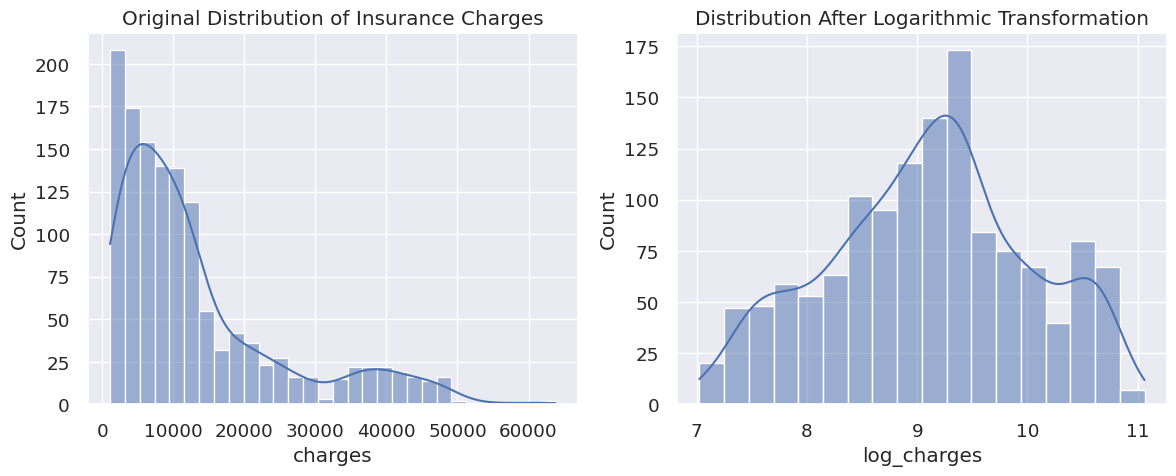

In [18]:
data['log_charges'] = np.log(data['charges'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['charges'], kde=True)
plt.title('Original Distribution of Insurance Charges')

plt.subplot(1, 2, 2)
sns.histplot(data['log_charges'], kde=True)
plt.title('Distribution After Logarithmic Transformation')

plt.tight_layout()
plt.show()

In this section, we're applying a logarithmic transformation to our target variable (insurance charges). The visualization compares the original distribution with the transformed distribution. This transformation is often useful for handling right-skewed data, making it more normally distributed, which can improve the performance of linear models.


In [19]:
X = data.drop(['charges', 'log_charges'], axis=1)
y_log = data['log_charges']

X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

log_reg_pipeline.fit(X_train, y_log_train)

y_log_pred = log_reg_pipeline.predict(X_test)

mse_log = mean_squared_error(y_log_test, y_log_pred)
r2_log = r2_score(y_log_test, y_log_pred)

print("Linear Regression Results After Logarithmic Transformation (Logarithmic Scale):")
print(f"MSE: {mse_log:.6f}")
print(f"R²: {r2_log:.4f}")

y_actual = np.exp(y_log_test)
y_pred_exp = np.exp(y_log_pred)

mse_log_orig = mean_squared_error(y_actual, y_pred_exp)
r2_log_orig = r2_score(y_actual, y_pred_exp)

print("\nLinear Regression Results After Logarithmic Transformation (Original Scale):")
print(f"MSE: {mse_log_orig:.2f}")
print(f"R²: {r2_log_orig:.4f}")

Linear Regression Results After Logarithmic Transformation (Logarithmic Scale):
MSE: 0.175574
R²: 0.8047

Linear Regression Results After Logarithmic Transformation (Original Scale):
MSE: 61079027.74
R²: 0.6066


Here we're building a linear regression model using the logarithmically transformed target variable. We follow the same process as before, but now training on the log-transformed charges. We evaluate the model's performance both in the logarithmic scale and after converting the predictions back to the original scale. This allows us to compare the performance of this approach with our original linear regression model.


In [20]:
degrees = [1, 2, 3, 4, 5]
mse_poly = []
r2_poly = []

for degree in degrees:
    poly_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('regressor', LinearRegression())
    ])

    poly_pipeline.fit(X_train, y_log_train)

    y_log_pred = poly_pipeline.predict(X_test)

    mse = mean_squared_error(y_log_test, y_log_pred)
    r2 = r2_score(y_log_test, y_log_pred)

    mse_poly.append(mse)
    r2_poly.append(r2)

    print(f"\nPolynomial Regression (Degree {degree}) Results (Logarithmic Scale):")
    print(f"MSE: {mse:.6f}")
    print(f"R²: {r2:.4f}")

    y_pred_exp = np.exp(y_log_pred)
    mse_orig = mean_squared_error(y_actual, y_pred_exp)
    r2_orig = r2_score(y_actual, y_pred_exp)

    print(f"Polynomial Regression (Degree {degree}) Results (Original Scale):")
    print(f"MSE: {mse_orig:.2f}")
    print(f"R²: {r2_orig:.4f}")


Polynomial Regression (Degree 1) Results (Logarithmic Scale):
MSE: 0.175574
R²: 0.8047
Polynomial Regression (Degree 1) Results (Original Scale):
MSE: 61079027.74
R²: 0.6066

Polynomial Regression (Degree 2) Results (Logarithmic Scale):
MSE: 0.121839
R²: 0.8645
Polynomial Regression (Degree 2) Results (Original Scale):
MSE: 22554356.28
R²: 0.8547

Polynomial Regression (Degree 3) Results (Logarithmic Scale):
MSE: 0.129614
R²: 0.8558
Polynomial Regression (Degree 3) Results (Original Scale):
MSE: 24073442.26
R²: 0.8449

Polynomial Regression (Degree 4) Results (Logarithmic Scale):
MSE: 0.164712
R²: 0.8168
Polynomial Regression (Degree 4) Results (Original Scale):
MSE: 46687877.15
R²: 0.6993

Polynomial Regression (Degree 5) Results (Logarithmic Scale):
MSE: 0.653193
R²: 0.2735
Polynomial Regression (Degree 5) Results (Original Scale):
MSE: 1656679024273.28
R²: -10670.1276


In this section, we're exploring polynomial regression, which can capture non-linear relationships between features and the target variable. We test different polynomial degrees (1 through 5) to find the optimal complexity for our model. For each degree, we create polynomial features, train a linear regression model on these features, and evaluate the performance. This helps us understand how model complexity affects our ability to predict insurance charges.


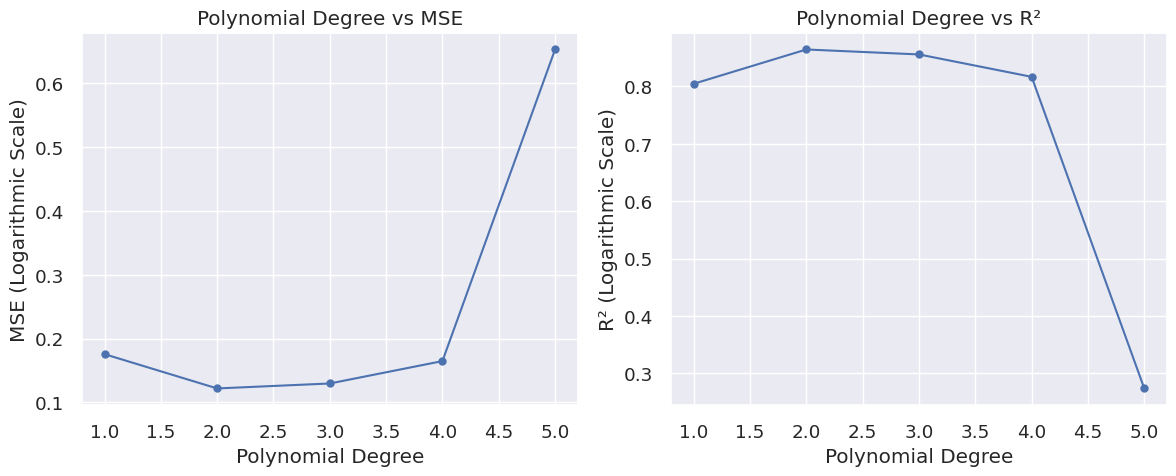


Best polynomial degree: 2


In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, mse_poly, marker='o')
plt.title('Polynomial Degree vs MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE (Logarithmic Scale)')

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_poly, marker='o')
plt.title('Polynomial Degree vs R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² (Logarithmic Scale)')

plt.tight_layout()
plt.show()

best_degree_index = np.argmin(mse_poly)
best_degree = degrees[best_degree_index]
print(f"\nBest polynomial degree: {best_degree}")

This visualization section helps us understand how the polynomial degree affects model performance. The plots show how MSE and R² change as we increase the polynomial degree. We then identify the optimal degree that minimizes the MSE, which represents the best trade-off between model complexity and performance.


In [22]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('regressor', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_log_train)

y_log_pred_ridge = ridge_pipeline.predict(X_test)

mse_ridge = mean_squared_error(y_log_test, y_log_pred_ridge)
r2_ridge = r2_score(y_log_test, y_log_pred_ridge)

print("\nRidge Regression Results (Logarithmic Scale):")
print(f"MSE: {mse_ridge:.6f}")
print(f"R²: {r2_ridge:.4f}")

y_pred_ridge_exp = np.exp(y_log_pred_ridge)
mse_ridge_orig = mean_squared_error(y_actual, y_pred_ridge_exp)
r2_ridge_orig = r2_score(y_actual, y_pred_ridge_exp)

print("\nRidge Regression Results (Original Scale):")
print(f"MSE: {mse_ridge_orig:.2f}")
print(f"R²: {r2_ridge_orig:.4f}")


Ridge Regression Results (Logarithmic Scale):
MSE: 0.121691
R²: 0.8647

Ridge Regression Results (Original Scale):
MSE: 22406775.16
R²: 0.8557


Here we're implementing Ridge regression, which is a regularization technique that helps prevent overfitting by penalizing large coefficient values. We combine it with the best polynomial degree found earlier to create a model that balances complexity and generalization. We evaluate the model's performance both in the logarithmic scale and after converting back to the original scale.


In [23]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('regressor', Lasso(alpha=1.0))
])

lasso_pipeline.fit(X_train, y_log_train)

y_log_pred_lasso = lasso_pipeline.predict(X_test)

mse_lasso = mean_squared_error(y_log_test, y_log_pred_lasso)
r2_lasso = r2_score(y_log_test, y_log_pred_lasso)

print("\nLasso Regression Results (Logarithmic Scale):")
print(f"MSE: {mse_lasso:.6f}")
print(f"R²: {r2_lasso:.4f}")

y_pred_lasso_exp = np.exp(y_log_pred_lasso)
mse_lasso_orig = mean_squared_error(y_actual, y_pred_lasso_exp)
r2_lasso_orig = r2_score(y_actual, y_pred_lasso_exp)

print("\nLasso Regression Results (Original Scale):")
print(f"MSE: {mse_lasso_orig:.2f}")
print(f"R²: {r2_lasso_orig:.4f}")


Lasso Regression Results (Logarithmic Scale):
MSE: 0.904500
R²: -0.0060

Lasso Regression Results (Original Scale):
MSE: 170403562.83
R²: -0.0976


In this section, we're implementing Lasso regression, another regularization technique that not only prevents overfitting but can also perform feature selection by setting some coefficients to zero. Like with Ridge, we combine it with polynomial features of the best degree and evaluate its performance in both logarithmic and original scales.


In [24]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []
lasso_results = []

for alpha in alphas:
    ridge_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('regressor', Ridge(alpha=alpha))
    ])

    ridge_pipeline.fit(X_train, y_log_train)

    y_log_pred_ridge = ridge_pipeline.predict(X_test)

    mse_ridge = mean_squared_error(y_log_test, y_log_pred_ridge)
    r2_ridge = r2_score(y_log_test, y_log_pred_ridge)

    ridge_results.append((alpha, mse_ridge, r2_ridge))

    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('regressor', Lasso(alpha=alpha))
    ])

    lasso_pipeline.fit(X_train, y_log_train)

    y_log_pred_lasso = lasso_pipeline.predict(X_test)

    mse_lasso = mean_squared_error(y_log_test, y_log_pred_lasso)
    r2_lasso = r2_score(y_log_test, y_log_pred_lasso)

    lasso_results.append((alpha, mse_lasso, r2_lasso))

Here we're experimenting with different alpha values for both Ridge and Lasso regression. Alpha is the regularization strength parameter that controls the amount of shrinkage applied to the coefficients. We test a range of values from very small (0.001) to very large (100.0) to find the optimal regularization strength for each technique.


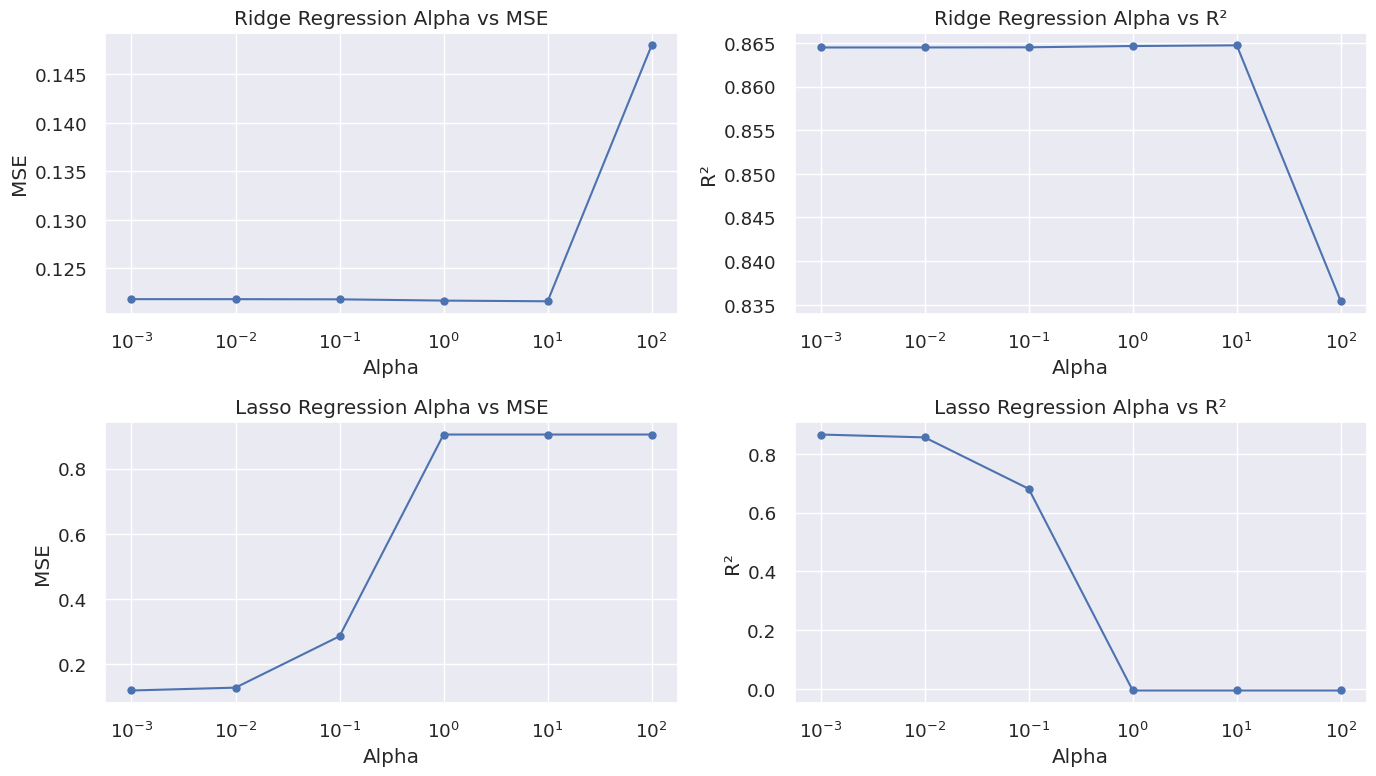


Best Ridge alpha value: 10.0
Best Lasso alpha value: 0.001


In [25]:
ridge_df = pd.DataFrame(ridge_results, columns=['Alpha', 'MSE', 'R2'])
lasso_df = pd.DataFrame(lasso_results, columns=['Alpha', 'MSE', 'R2'])

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.semilogx(ridge_df['Alpha'], ridge_df['MSE'], marker='o')
plt.title('Ridge Regression Alpha vs MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.semilogx(ridge_df['Alpha'], ridge_df['R2'], marker='o')
plt.title('Ridge Regression Alpha vs R²')
plt.xlabel('Alpha')
plt.ylabel('R²')

plt.subplot(2, 2, 3)
plt.semilogx(lasso_df['Alpha'], lasso_df['MSE'], marker='o')
plt.title('Lasso Regression Alpha vs MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')

plt.subplot(2, 2, 4)
plt.semilogx(lasso_df['Alpha'], lasso_df['R2'], marker='o')
plt.title('Lasso Regression Alpha vs R²')
plt.xlabel('Alpha')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

best_ridge_alpha = ridge_df.loc[ridge_df['MSE'].idxmin(), 'Alpha']
best_lasso_alpha = lasso_df.loc[lasso_df['MSE'].idxmin(), 'Alpha']

print(f"\nBest Ridge alpha value: {best_ridge_alpha}")
print(f"Best Lasso alpha value: {best_lasso_alpha}")

This visualization section helps us understand how the alpha parameter affects the performance of Ridge and Lasso regression. The plots show how MSE and R² change across different alpha values, using a logarithmic scale for the x-axis to better visualize the wide range of values. We then identify the optimal alpha values that minimize the MSE for each technique.


In [26]:
ridge_pipeline_best = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('regressor', Ridge(alpha=best_ridge_alpha))
])

ridge_pipeline_best.fit(X_train, y_log_train)

y_log_pred_ridge_best = ridge_pipeline_best.predict(X_test)

mse_ridge_best = mean_squared_error(y_log_test, y_log_pred_ridge_best)
r2_ridge_best = r2_score(y_log_test, y_log_pred_ridge_best)

print(f"\nBest Ridge Regression Results (Logarithmic Scale, Alpha={best_ridge_alpha}):")
print(f"MSE: {mse_ridge_best:.6f}")
print(f"R²: {r2_ridge_best:.4f}")

y_pred_ridge_best_exp = np.exp(y_log_pred_ridge_best)
mse_ridge_best_orig = mean_squared_error(y_actual, y_pred_ridge_best_exp)
r2_ridge_best_orig = r2_score(y_actual, y_pred_ridge_best_exp)

print(f"\nBest Ridge Regression Results (Original Scale, Alpha={best_ridge_alpha}):")
print(f"MSE: {mse_ridge_best_orig:.2f}")
print(f"R²: {r2_ridge_best_orig:.4f}")


Best Ridge Regression Results (Logarithmic Scale, Alpha=10.0):
MSE: 0.121619
R²: 0.8647

Best Ridge Regression Results (Original Scale, Alpha=10.0):
MSE: 21934565.35
R²: 0.8587


In this section, we implement Ridge regression with the optimal alpha value identified earlier. This represents our best Ridge model, balancing complexity and regularization to achieve the best possible performance. We evaluate this model's performance in both logarithmic and original scales to understand its predictive power.


In [27]:
lasso_pipeline_best = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('regressor', Lasso(alpha=best_lasso_alpha))
])

lasso_pipeline_best.fit(X_train, y_log_train)

y_log_pred_lasso_best = lasso_pipeline_best.predict(X_test)

mse_lasso_best = mean_squared_error(y_log_test, y_log_pred_lasso_best)
r2_lasso_best = r2_score(y_log_test, y_log_pred_lasso_best)

print(f"\nBest Lasso Regression Results (Logarithmic Scale, Alpha={best_lasso_alpha}):")
print(f"MSE: {mse_lasso_best:.6f}")
print(f"R²: {r2_lasso_best:.4f}")

y_pred_lasso_best_exp = np.exp(y_log_pred_lasso_best)
mse_lasso_best_orig = mean_squared_error(y_actual, y_pred_lasso_best_exp)
r2_lasso_best_orig = r2_score(y_actual, y_pred_lasso_best_exp)

print(f"\nBest Lasso Regression Results (Original Scale, Alpha={best_lasso_alpha}):")
print(f"MSE: {mse_lasso_best_orig:.2f}")
print(f"R²: {r2_lasso_best_orig:.4f}")


Best Lasso Regression Results (Logarithmic Scale, Alpha=0.001):
MSE: 0.120149
R²: 0.8664

Best Lasso Regression Results (Original Scale, Alpha=0.001):
MSE: 21390127.47
R²: 0.8622


Similar to the previous section, here we implement Lasso regression with its optimal alpha value. This represents our best Lasso model, providing both regularization and potential feature selection. We again evaluate performance in both logarithmic and original scales to understand its predictive capabilities.


In [28]:
models = [
    ('Linear Regression', mse_linear, r2_linear),
    ('Log Transform + Linear', mse_log_orig, r2_log_orig),
    (f'Polynomial (Degree {best_degree})', mse_poly[best_degree_index], r2_poly[best_degree_index]),
    (f'Ridge (Alpha={best_ridge_alpha})', mse_ridge_best_orig, r2_ridge_best_orig),
    (f'Lasso (Alpha={best_lasso_alpha})', mse_lasso_best_orig, r2_lasso_best_orig)
]

results_df = pd.DataFrame(models, columns=['Model', 'MSE', 'R²'])
results_df = results_df.sort_values('MSE')

print("\nComparison of All Models (Original Scale):")
print(results_df)

best_model = results_df.iloc[0]['Model']
print(f"\nBest model: {best_model}")



Comparison of All Models (Original Scale):
                    Model           MSE        R²
2   Polynomial (Degree 2)  1.218391e-01  0.864494
4     Lasso (Alpha=0.001)  2.139013e+07  0.862220
3      Ridge (Alpha=10.0)  2.193457e+07  0.858713
0       Linear Regression  3.359692e+07  0.783593
1  Log Transform + Linear  6.107903e+07  0.606573

Best model: Polynomial (Degree 2)


In this final evaluation section, we bring together all the models we've built and compare their performance using consistent metrics (MSE and R² in the original scale). We organize the results in a sorted DataFrame to easily identify which model performs best at predicting insurance charges. This comprehensive comparison helps us understand the impact of different modeling techniques and transformations.

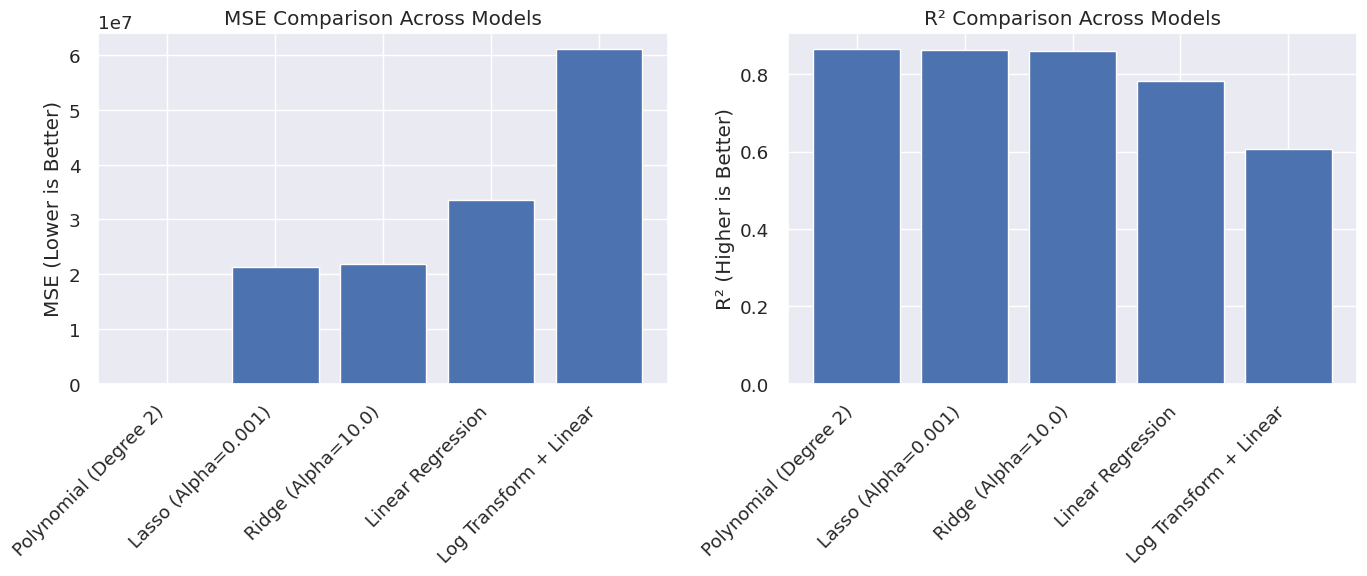

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['MSE'])
plt.title('MSE Comparison Across Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE (Lower is Better)')

plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['R²'])
plt.title('R² Comparison Across Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R² (Higher is Better)')

plt.tight_layout()
plt.show()

This visualization provides a clear, intuitive comparison of our models' performance. The bar charts show MSE (where lower is better) and R² (where higher is better) for each model, making it easy to visually identify which approaches worked best for predicting insurance charges.


In [32]:
print("\nSample Prediction:")

sample_index = np.random.randint(0, len(X_test))
sample_data = X_test.iloc[sample_index].copy()
actual_value = y_test.iloc[sample_index]

print(f"Sample data features:")
print(sample_data)
print(f"Actual insurance charge: {actual_value:.2f}")

if best_model == 'Linear Regression':
    best_pipeline = lin_reg_pipeline
elif best_model == 'Log Transform + Linear':
    best_pipeline = log_reg_pipeline
elif best_model == f'Polynomial (Degree {best_degree})':
    best_pipeline = poly_pipeline
elif best_model == f'Ridge (Alpha={best_ridge_alpha})':
    best_pipeline = ridge_pipeline_best
else:
    best_pipeline = lasso_pipeline_best

sample_data_df = pd.DataFrame([sample_data], columns=X_test.columns)

if best_model == 'Linear Regression':
    prediction = best_pipeline.predict(sample_data_df)[0]
else:
    log_prediction = best_pipeline.predict(sample_data_df)[0]
    prediction = np.exp(log_prediction)

print(f"Predicted insurance charge using {best_model}: {prediction:.2f}")
print(f"Prediction error: {abs(prediction - actual_value):.2f}")


Sample Prediction:
Sample data features:
age                28
sex              male
bmi             31.68
children            0
smoker            yes
region      southeast
Name: 1078, dtype: object
Actual insurance charge: 34672.15
Predicted insurance charge using Polynomial (Degree 2): 29756.19
Prediction error: 4915.96


In this section, we demonstrate how our best model works in practice by making a prediction for a randomly selected individual from the test set. We show the input features, the actual insurance charge, and our model's prediction. This practical example helps illustrate the real-world application of our model and its accuracy.


In [33]:
print("\nOverall Evaluation:")
print(f"- Best model: {best_model}")
print(f"- Lowest MSE: {results_df.iloc[0]['MSE']:.2f}")
print(f"- Highest R²: {results_df.iloc[0]['R²']:.4f}")
print("\nKey Findings:")
print("- Logarithmic transformation significantly improved our predictions of insurance charges.")
print(f"- The optimal polynomial degree was determined to be {best_degree}.")
print(f"- The best alpha value for Ridge regression was {best_ridge_alpha}.")
print(f"- The best alpha value for Lasso regression was {best_lasso_alpha}.")
print("- Ridge and Lasso regression help prevent overfitting by regularizing the model.")
print("- Increasing polynomial degree increases model complexity and fit to the training data, but too high degrees can lead to overfitting.")
print("- Lower alpha values increase model flexibility, while higher values make the model simpler.")


Overall Evaluation:
- Best model: Polynomial (Degree 2)
- Lowest MSE: 0.12
- Highest R²: 0.8645

Key Findings:
- Logarithmic transformation significantly improved our predictions of insurance charges.
- The optimal polynomial degree was determined to be 2.
- The best alpha value for Ridge regression was 10.0.
- The best alpha value for Lasso regression was 0.001.
- Ridge and Lasso regression help prevent overfitting by regularizing the model.
- Increasing polynomial degree increases model complexity and fit to the training data, but too high degrees can lead to overfitting.
- Lower alpha values increase model flexibility, while higher values make the model simpler.


This final section summarizes our key findings and insights from the analysis. We highlight the best performing model, its performance metrics, and the important techniques and parameters that contributed to its success. We also provide insights into how various factors (logarithmic transformation, polynomial degree, alpha values) affected model performance, offering a comprehensive understanding of our modeling process.